# AlexNet

In [52]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import time

start_time = time.time()

## Panel sterowania

In [53]:
data_set = keras.datasets.cifar10.load_data()

number_of_epochs = 2 # domyślnie było 50

#wszystko, co jest użyte do zrobienia modelu

## Sieć

In [54]:
(train_images, train_labels), (test_images, test_labels) = data_set

train_ds=tf.data.Dataset.from_tensor_slices((train_images,train_labels))
test_ds=tf.data.Dataset.from_tensor_slices((test_images,test_labels))

In [55]:
def process_image(image,label):
    image=tf.image.per_image_standardization(image)
    image=tf.image.resize(image, (64, 64))
    
    return image,label

train_ds_size=tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size=tf.data.experimental.cardinality(test_ds).numpy()

train_ds=(train_ds
          .map(process_image)
          .shuffle(buffer_size=train_ds_size)
          .batch(batch_size=32,drop_remainder=True)
         )
test_ds=(test_ds
          .map(process_image)
          .shuffle(buffer_size=test_ds_size)
          .batch(batch_size=32,drop_remainder=True)
         )

In [56]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(64,64,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation='softmax')  
    
    
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.optimizers.SGD(lr=0.001),
    metrics=['accuracy']    
)
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 14, 14, 128)       46592     
                                                                 
 batch_normalization_30 (Bat  (None, 14, 14, 128)      512       
 chNormalization)                                                
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 7, 7, 256)         819456    
                                                                 
 batch_normalization_31 (Bat  (None, 7, 7, 256)        1024      
 chNormalization)                                                
                                                      

In [57]:
history=model.fit(
    train_ds,
    epochs = number_of_epochs,
    validation_data=test_ds,
    validation_freq=1
)

Epoch 1/2
1562/1562 [==============================] - 21s 9ms/step - loss: 1.6945 - accuracy: 0.3861 - val_loss: 1.3180 - val_accuracy: 0.5236
Epoch 2/2
1562/1562 [==============================] - 17s 8ms/step - loss: 1.3000 - accuracy: 0.5357 - val_loss: 1.1533 - val_accuracy: 0.5893


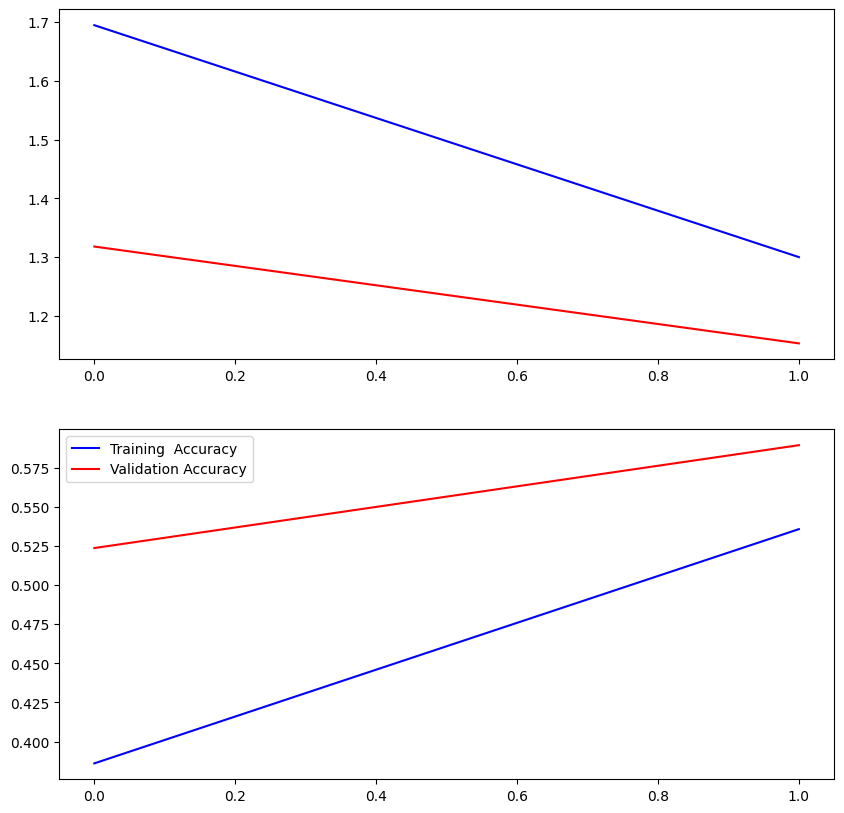

In [58]:
model.history.history.keys()

f,ax=plt.subplots(2,1,figsize=(10,10)) 

#Assigning the first subplot to graph training loss and validation loss
ax[0].plot(model.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(model.history.history['val_loss'],color='r',label='Validation Loss')

#Plotting the training accuracy and validation accuracy
ax[1].plot(model.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(model.history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()



In [59]:
print('Accuracy Score = ',np.max(history.history['val_accuracy']))

end_time = time.time()
print(f"Whole kernel time: {(end_time - start_time)/60} min")

Accuracy Score =  0.5893429517745972
Whole kernel time: 0.6750860134760539 min
